<center><h1>Customers and Products Analysis</h1></center>

<img src="Images/model.jpg" />

# Table of Contents

1. [**Introduction**](#1)
2. [**Loading the Data**](#2)
3. [**Data Exploration**](#3)
4. [**Data Analysis**](4#)
    * [Products in High Demand](#4.1)
    * [Customer Engagement](#4.2)
    * [Profits Earned by Country](#4.3)
    * [Popular Product Lines](#4.4)
    * [Profits Performance](#4.5)
    * [New Customers](#4.6)
    * [Customer Lifetime Value](#4.7)
    
    
5. [**Recommendations**](#5)
6. [**Conclusion**](#6)

<a id="1"></a>
# Introduction
In this project we will be analyzing data for a hypothetical company that distributes die cast models of vehicles including cars, motorcycles, planes, trucks, buses, ships and trains.
Sales data analysis can cover many aspects(sales, production, customer, experience, employee efficiency); therefore, it presents many challenges. We will cover two aspects in this analysis: customer and products.

**Project Goal:** The goal of this project is to analyze data from a sales records database for die cast models of vehicles and extract information for decision-making.

We will be focusing on answering the following questions:
1. Which products should we order more of?
2. Who are our top performing and least engaged customers?
3. In which countries should we target our marketing for maximum returns?
4. What is the performance of the various categories?
5. How have the sales performed over the years?
6. Should we focus on getting new customers or engaging our existing customers to increase the sales?
7. How much can we spend on acquiring new customers? 

Let's load the project database.

<a id="2"></a>
# Loading Data
The scale model cars database schema is as follows:
<img src="Images/db_schema.png" />

The database contains 8 tables:
* customers: customer data
* employees: all employee information
* offices: sales office information
* orders: customers' sales orders
* orderdetails: sales order line for each sales order
* payments: customers' payment records
* products: a list of scale model cars
* productlines: a list of product line categories

In [1]:
%%capture
%load_ext sql
%sql sqlite:///stores.db

<a id="3"></a>
# Data Exploration
Let's summarize what we have in the database in a table. 

In [2]:
%%sql
SELECT '' AS Table_Names,'' AS Number_of_Attributes,'' AS Number_of_Rows
UNION ALL
SELECT 'Customer',13,(SELECT COUNT(*)
                        FROM customers)
UNION ALL
SELECT 'Products',9,(SELECT COUNT(*)
                        FROM products)
UNION ALL
SELECT 'ProductLines',4,(SELECT COUNT(*)
                        FROM productlines)
UNION ALL
SELECT 'Orders',7,(SELECT COUNT(*)
                        FROM orders)
UNION ALL
SELECT 'OrderDetails',5,(SELECT COUNT(*)
                        FROM orderdetails)
UNION ALL
SELECT 'Payments',4,(SELECT COUNT(*)
                        FROM payments)
UNION ALL
SELECT 'Employees',8,(SELECT COUNT(*)
                        FROM employees)
UNION ALL
SELECT 'Offices',9,(SELECT COUNT(*)
                        FROM offices);

 * sqlite:///stores.db
Done.


Table_Names,Number_of_Attributes,Number_of_Rows
,,
Customer,13,122
Products,9,110
ProductLines,4,7
Orders,7,326
OrderDetails,5,2996
Payments,4,273
Employees,8,23
Offices,9,7


Let's take a closer look at the tables to get an overview of the data set from this company.

In [3]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('stores.db')
offices = pd.read_sql_query("""SELECT *
                            FROM offices;""", conn)
offices

,officeCode,city,phone,addressLine1,addressLine2,state,country,postalCode,territory
0,1,San Francisco,+1 650 219 4782,100 Market Street,Suite 300,CA,USA,94080,NA
1,2,Boston,+1 215 837 0825,1550 Court Place,Suite 102,MA,USA,02107,NA
2,3,NYC,+1 212 555 3000,523 East 53rd Street,apt. 5A,NY,USA,10022,NA
3,4,Paris,+33 14 723 4404,43 Rue Jouffroy D'abbans,None,None,France,75017,EMEA
4,5,Tokyo,+81 33 224 5000,4-1 Kioicho,None,Chiyoda-Ku,Japan,102-8578,Japan
5,6,Sydney,+61 2 9264 2451,5-11 Wentworth Avenue,Floor #2,None,Australia,NSW 2010,APAC
6,7,London,+44 20 7877 2041,25 Old Broad Street,Level 7,None,UK,EC2N 1HN,EMEA


In [4]:
%%sql
SELECT country, COUNT(*) AS num_offices
  FROM offices
 GROUP BY country
 ORDER BY num_offices DESC;

 * sqlite:///stores.db
Done.


country,num_offices
USA,3
Australia,1
France,1
Japan,1
UK,1


The company has offices in `5` countries, with `USA` having 3 offices in NYC, San Francisco and Boston.

In [5]:
%%sql
SELECT productLine AS category, COUNT(*) AS num_products
  FROM products
 GROUP BY productLine
 ORDER BY num_products DESC;

 * sqlite:///stores.db
Done.


category,num_products
Classic Cars,38
Vintage Cars,24
Motorcycles,13
Planes,12
Trucks and Buses,11
Ships,9
Trains,3


There are different products from the company, categorized into product lines.

In [6]:
orders = pd.read_sql_query("""SELECT *
                            FROM orders;""", conn)
orders.head()

,orderNumber,orderDate,requiredDate,shippedDate,status,comments,customerNumber
0,10100,2003-01-06,2003-01-13,2003-01-10,Shipped,None,363
1,10101,2003-01-09,2003-01-18,2003-01-11,Shipped,Check on availability.,128
2,10102,2003-01-10,2003-01-18,2003-01-14,Shipped,None,181
3,10103,2003-01-29,2003-02-07,2003-02-02,Shipped,None,121
4,10104,2003-01-31,2003-02-09,2003-02-01,Shipped,None,141


Every incoming order lists certain order specific details related to a product and those details are listed in the `OrderDetails` table. The `status` column in the order tracks the progress of the order from when it is received to when it is shipped out. Let's take a look at this column.

In [7]:
%%sql
SELECT status,COUNT(*) AS num_orders
  FROM orders
 GROUP BY status
 ORDER BY num_orders DESC;

 * sqlite:///stores.db
Done.


status,num_orders
Shipped,303
Cancelled,6
In Process,6
On Hold,4
Resolved,4
Disputed,3


In [8]:
payments = pd.read_sql_query("""SELECT *
                            FROM payments;""", conn)
payments.head()

,customerNumber,checkNumber,paymentDate,amount
0,103,HQ336336,2004-10-19,6066.78
1,103,JM555205,2003-06-05,14571.44
2,103,OM314933,2004-12-18,1676.14
3,112,BO864823,2004-12-17,14191.12
4,112,HQ55022,2003-06-06,32641.98


In [9]:
customers = pd.read_sql_query("""SELECT *
                            FROM customers;""", conn)
customers.head()

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
0,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,France,1370.0,21000
1,112,Signal Gift Stores,King,Jean,7025551838,8489 Strong St.,None,Las Vegas,NV,83030,USA,1166.0,71800
2,114,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,1611.0,117300
3,119,La Rochelle Gifts,Labrune,Janine,40.67.8555,"67, rue des Cinquante Otages",None,Nantes,None,44000,France,1370.0,118200
4,121,Baane Mini Imports,Bergulfsen,Jonas,07-98 9555,Erling Skakkes gate 78,None,Stavern,None,4110,Norway,1504.0,81700


Once the order is shipped out, customers seem to be paying for their orders in a cumulative manner. Customers have the option of utilising credit based on the `CreditLimit` column the in the `customers` table. Every customer is assigned to a sales representative, whose employee ID is documented in the `customers` table, in `salesRepEmployeeNumber` column.

Now that we know the database a little better, we can answer the questions we have:

<a id="4"></a>
# Data Analysis
<a id="4.1"></a>
## Products in High Demand
**Which products should we order more of?**      
The first question refers to inventory reports, including low stock and product performance. This will optimize the supply and the user experience by preventing best-selling products from going out of stock. 

<img src="Images/low_stock_2.png" />

<img src="Images/order.png" />


Priority products for restocking are those with high product performance that are on the brink of being out of stock.

In [10]:
%%sql
WITH 
low_stock_table AS (
--low stock
SELECT productCode,
       ROUND(SUM(quantityOrdered) * 1.0 / (SELECT quantityInStock
                                             FROM products p
                                            WHERE od.productCode = p.productCode),2) AS low_stock
  FROM orderdetails od
 GROUP BY productCode
 ORDER BY low_stock DESC
 LIMIT 10
)

SELECT p.productLine AS product_line,
       p.productName AS model, 
       p.quantityInStock AS quantity_in_stock,
       COUNT(*) AS num_orders,
       SUM(quantityOrdered) AS total_ordered,
       ROUND(SUM(od.quantityOrdered * od.priceEach),2) AS total_sales
  FROM orderdetails od
  JOIN products p
    ON p.productCode = od.productCode
 WHERE p.productCode IN (SELECT productCode
                         FROM low_stock_table)
 GROUP BY p.productCode
 ORDER BY total_sales DESC, quantityInStock
 LIMIT 10;

 * sqlite:///stores.db
Done.


product_line,model,quantity_in_stock,num_orders,total_ordered,total_sales
Classic Cars,1968 Ford Mustang,68,27,933,161531.48
Vintage Cars,1928 Mercedes-Benz SSK,548,28,880,132275.98
Motorcycles,1997 BMW F650 ST,178,28,1014,89364.89
Planes,F/A 18 Hornet 1/72,551,28,1047,76618.4
Motorcycles,2002 Yamaha YZR M1,600,27,992,73670.64
Ships,The Mayflower,737,27,898,69531.61
Motorcycles,1960 BSA Gold Star DBD34,15,28,1015,67193.49
Vintage Cars,1928 Ford Phaeton Deluxe,136,28,972,60493.33
Ships,Pont Yacht,414,27,958,47550.4
Vintage Cars,1911 Ford Town Car,540,25,832,45306.77


**Insights** 
* `1968 Ford Mustang` is the model which is most in demand as it has the highest number of sales and few cars in stock. 
* Looking at the `1960 BSA Gold Star DBD34`, the number of orders is more than the quantity in stock, therefore more motorcycles needed.

<a id="4.2"></a>
## Customer Engagement
**Who are our top performing and least engaged customers?**      
Let us identify our most loyal customers. We have 122 customers in total. We'll look at the top 5 and the 5 least engaged customers based on the profits obtained through the customers.

In [11]:
%%sql
DROP VIEW profits_view;
print()

 * sqlite:///stores.db
Done.
(sqlite3.OperationalError) near "print": syntax error
[SQL: print()]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [12]:
%%sql
CREATE VIEW profits_view AS 
SELECT o.customerNumber,
       ROUND(SUM(quantityOrdered * (priceEach - buyPrice)), 2) AS profit       
  FROM products p
  JOIN orderdetails od
    ON p.productCode = od.productCode
  JOIN orders o
    ON o.orderNumber = od.orderNumber
 GROUP BY o.customerNumber;

SELECT c.contactLastName || " " || c.contactFirstName AS customer_name,
       c.city, c.country, 
       pv.profit
  FROM customers c
  JOIN profits_view pv
    ON c.customerNumber = pv.customerNumber
 WHERE c.customerNumber IN (SELECT customerNumber
                              FROM profits_view
                             ORDER BY profit DESC
                               LIMIT 5)
 ORDER BY pv.profit DESC

 * sqlite:///stores.db
Done.
Done.


customer_name,city,country,profit
Freyre Diego,Madrid,Spain,326519.66
Nelson Susan,San Rafael,USA,236769.39
Young Jeff,NYC,USA,72370.09
Ferguson Peter,Melbourne,Australia,70311.07
Labrune Janine,Nantes,France,60875.3


Let's now look at the least engaged customers. 

In [13]:
%%sql
SELECT c.contactLastName || " " || c.contactFirstName AS customer_name,
       c.city, c.country, 
       pv.profit
  FROM customers c
  JOIN profits_view pv
    ON c.customerNumber = pv.customerNumber
 WHERE c.customerNumber IN (SELECT customerNumber
                              FROM profits_view
                             ORDER BY profit 
                               LIMIT 5)
 ORDER BY pv.profit;

 * sqlite:///stores.db
Done.


customer_name,city,country,profit
Young Mary,Glendale,USA,2610.87
Taylor Leslie,Brickhaven,USA,6586.02
Ricotti Franco,Milan,Italy,9532.93
Schmitt Carine,Nantes,France,10063.8
Smith Thomas,London,UK,10868.04


**Insights**
* `Freyre Diego`, who is from Spain drives the highest profit amongst our clients.
* On the other hand, `Young Mary` from USA is brings in the lowest profit. 
* We have clients from both `USA` and `France` featured as the most engaged and least engaged customers. 

Let's take a closer look at the sales in the different countries. 

<a id="4.3"></a>
## Profits Earned by Country
**In which countries should we target our marketing for maximum returns?**     
We need to identify markets where we will yield more customers. Besides attracting customers, we also want to get high value customers to increase our profits. 

In order to identify potential markets, we will analyze the following:
* Number of customers in each country,
* Percentage of profit contributed by each country, and
* Profits by each customer we have in the different countries.

In [14]:
%%sql
SELECT c.country AS country, 
       COUNT(*) AS num_customers,
       ROUND(SUM(pv.profit),2) AS profit,
       ROUND(SUM(pv.profit)/COUNT(*),2) AS profit_per_customer,
       ROUND((SUM(pv.profit) * 100.0/ (SELECT SUM(profit)
                                          FROM profits_view)), 2) AS profit_percentage
  FROM customers c
  JOIN profits_view pv
    ON c.customerNumber = pv.customerNumber
 GROUP BY c.country
 ORDER BY profit DESC;

 * sqlite:///stores.db
Done.


country,num_customers,profit,profit_per_customer,profit_percentage
USA,35,1308815.59,37394.73,34.21
Spain,5,440004.54,88000.91,11.5
France,12,413016.12,34418.01,10.8
Australia,5,222207.18,44441.44,5.81
New Zealand,4,189506.58,47376.64,4.95
UK,5,172964.26,34592.85,4.52
Italy,4,144459.86,36114.96,3.78
Finland,3,117239.33,39079.78,3.06
Singapore,2,101782.55,50891.27,2.66
Denmark,2,85629.3,42814.65,2.24


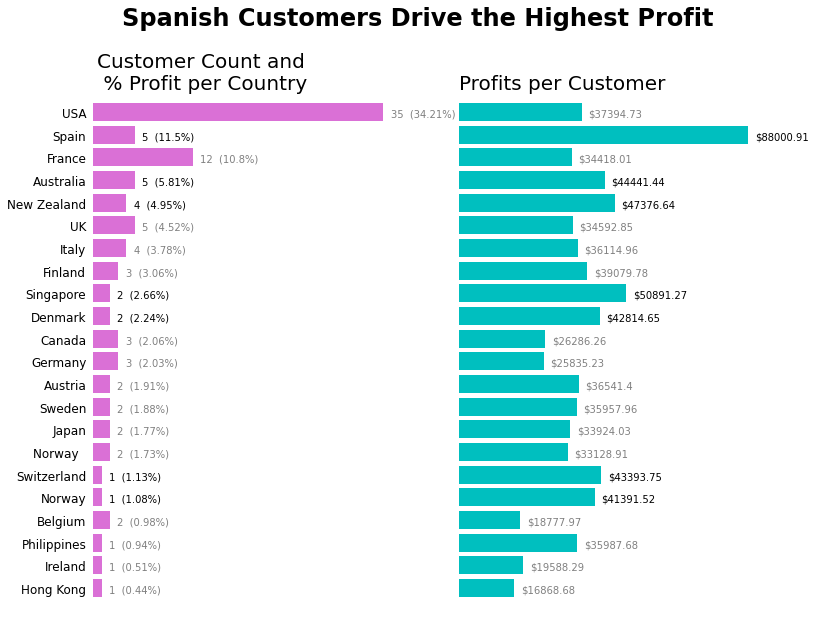

In [15]:
# import libraries
import matplotlib.pyplot as plt
%matplotlib inline

global_profits = pd.read_sql_query(
"""SELECT c.country AS country, 
          COUNT(*) AS num_customers,
          ROUND(SUM(pv.profit),2) AS profit,
          ROUND(SUM(pv.profit)/COUNT(*),2) AS profit_per_customer,
          ROUND((SUM(pv.profit) * 100.0/ (SELECT SUM(profit)
                                            FROM profits_view)), 2) AS profit_percentage
    FROM customers c
    JOIN profits_view pv
      ON c.customerNumber = pv.customerNumber
   GROUP BY c.country
   ORDER BY profit;""", conn
)

fig = plt.figure(figsize=(12,10))

# plot number of customers and percentage profit per country 
ax1 = fig.add_subplot(1,2,1)
 
# plot customer count
ax1.barh(global_profits['country'],
         global_profits['num_customers'],
         color='orchid'
        )

# remove spines
for each_key in ax1.spines.keys():
    ax1.spines[each_key].set_visible(False)

# remove the xticks
ax1.tick_params(axis='y',left=False,labelsize=12)
ax1.tick_params(axis='x',bottom=False,labelbottom=False)

# select countries driving the highest profit
top_countries = [global_profits.iloc[i,0] for i in range(len(global_profits)) if global_profits.iloc[i,3]>40000]
palette = ['black' if global_profits.iloc[i,0] in top_countries else 'grey' for i in range(len(global_profits))]

# annotate the plot
for i in range(len(global_profits)):
    ax1.text(s=str(global_profits.iloc[i,1])+'  '+'('+str(global_profits.iloc[i,4])+'%'+')',
             x=global_profits.iloc[i,1]+0.9,
             y=i-0.2,
             color=palette[i])
    
ax1.text(x=0.5, y=22, s='Customer Count and \n % Profit per Country ', size=20)
# plot profit per customer
ax2 = fig.add_subplot(1,2,2)

ax2.barh(global_profits['country'],
         global_profits['profit_per_customer'],
         color='c'
        )

# remove spines
for each_key in ax2.spines.keys():
    ax2.spines[each_key].set_visible(False)
    
# remove xticks
ax2.tick_params(axis='y',left=False,labelsize=14,labelleft=False)
ax2.tick_params(axis='x',bottom=False,labelbottom=False)

# annotate the plot
for i in range(len(global_profits)):
    ax2.text(s='$'+str(global_profits.iloc[i,3]),
             x=global_profits.iloc[i,3]+2000,
             y=i-0.2,
             color=palette[i])
ax2.text(x=0.5, y=22, s="Profits per Customer", size=20)
plt.suptitle("Spanish Customers Drive the Highest Profit", size=24, weight='bold')
plt.show()


**Insights**
* There is a high number of customers in `USA` and `France`.
* There are a number of countries such as `Spain`, `Australia`, `New Zealand`, `Singapore`, `Denmark`, `Switzerland` and `Norway`, which have very few customers but account for noteworthy profits. These customers also spend more than customers in the `USA`, which has the highest number of customers. 
* There are country offices in `USA`, `France`, `Australia`, `Japan` and `UK`. The country offices have more than 5 customers apart from `Japan` which has only 2 customers.
* Countries from `South America` and `Africa` are absent altogether.

Let's take a closer look at the country bringing in the highest profits by customers: `Spain`, to see the products bought by our customers.

In [16]:
%%sql
WITH 
products_profits_table AS (
SELECT o.customerNumber, 
       ROUND(SUM(quantityOrdered * (priceEach - buyPrice)), 2) AS profit, 
       quantityOrdered,
       p.productLine, p.productName
  FROM products p
  JOIN orderdetails od
    ON p.productCode = od.productCode
  JOIN orders o
    ON o.orderNumber = od.orderNumber
 GROUP BY o.customerNumber
)

SELECT c.contactLastName || " " || c.contactFirstName AS customer_name,
       pt.productLine, pt.productName, pt.profit
  FROM customers c
  JOIN products_profits_table pt
    ON c.customerNumber = pt.customerNumber
  WHERE country = 'Spain'
  ORDER BY profit DESC;

 * sqlite:///stores.db
Done.


customer_name,productLine,productName,profit
Freyre Diego,Classic Cars,1982 Camaro Z28,326519.66
Sommer Martín,Classic Cars,1982 Camaro Z28,49192.39
Saavedra Eduardo,Planes,ATA: B757-300,24113.54
Roel José Pedro,Vintage Cars,1936 Mercedes Benz 500k Roadster,21225.65
Fernandez Jesus,Classic Cars,1969 Ford Falcon,18953.3


From the table above, most customers from Spain buy `Classic cars`. With this in mind, let us look at profit contributions of the different product lines towards the overall profit.

<a id="4.4"></a>
## Popular Product Lines
**What is the performance of the various categories?**



In [17]:
%%sql
SELECT p.productLine,
       ROUND(SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)), 2)AS profit,
       ROUND(SUM(od.quantityOrdered * (od.priceEach - p.buyPrice) * 100.0 / (SELECT SUM(profit)
                                                                              FROM profits_view)),2) AS perc_profit
                                                                    
             
  FROM orderdetails od
  JOIN products p
    ON p.productCode = od.productCode
 GROUP BY p.productLine
 ORDER BY profit DESC;
           

 * sqlite:///stores.db
Done.


productLine,profit,perc_profit
Classic Cars,1526212.2,39.89
Vintage Cars,737268.33,19.27
Motorcycles,469255.3,12.27
Trucks and Buses,400553.22,10.47
Planes,365960.71,9.57
Ships,261289.47,6.83
Trains,65341.02,1.71


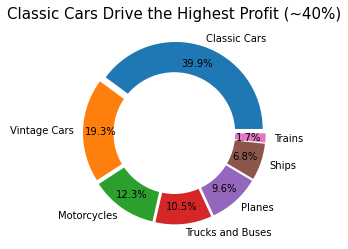

In [18]:
product_line_profit = pd.read_sql_query(
"""SELECT p.productLine,
          ROUND(SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)), 2)AS profit,
          ROUND(SUM(od.quantityOrdered * (od.priceEach - p.buyPrice) * 100.0 / (SELECT SUM(profit)
                                                                                  FROM profits_view)),2) AS perc_profit
                                                                    
             
    FROM orderdetails od
    JOIN products p
      ON p.productCode = od.productCode
   GROUP BY p.productLine
   ORDER BY profit DESC;""", conn
)

# plot donut chart
# set sizes and labels
sizes = product_line_profit['perc_profit']
labels = product_line_profit['productLine']

# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

#pie chart
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%',
        pctdistance=0.8,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# add circle in pie chart
fig.gca().add_artist(centre_circle)

plt.title('Classic Cars Drive the Highest Profit (~40%)', size=15)

plt.show()

**Insights**
* `classic cars` are the most sold product line, accounting for approximately 40% of the sales. 
* On the other hand, `trains` are the least sold product line, with 1.7% of the total sales.

<a id="4.5"></a>
## Profits Performance
**How have the sales performed over the years?**    
We will look at the monthly sales performance based on the profits we have made for each month over the years. 

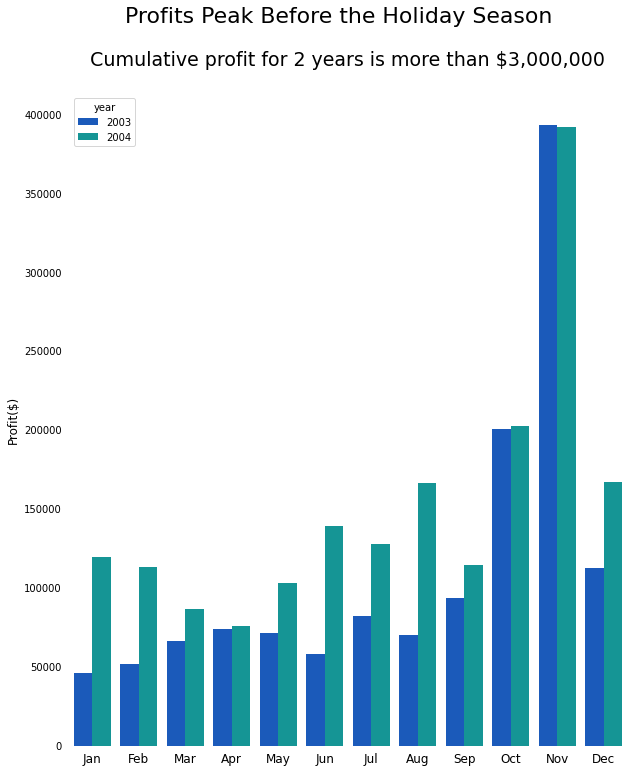

In [19]:
import seaborn as sns

monthly_profits = pd.read_sql_query(
"""WITH
orders_table AS(
SELECT o.*,
       ROUND(SUM((od.priceEach - p.buyPrice)*od.quantityOrdered),2) AS order_profit
  FROM orders o
  JOIN orderdetails od
    ON o.orderNumber=od.orderNumber
  JOIN products p
    ON od.productCode=p.productCode
 GROUP BY o.orderNumber
)
SELECT strftime('%Y',orderDate) AS year,
       strftime('%m', orderDate) AS month,
       SUM(ot.order_profit) AS profit
  FROM orders_table ot
 GROUP BY year, month
 HAVING year < '2005';""", conn
)

plt.figure(figsize=(10,12))

# plot monthly profits
ax = sns.barplot(x='month',
                y='profit',
                hue='year',
                data=monthly_profits,
                palette='winter')

# remove spines
spines = ['top', 'bottom', 'right', 'left']
for spine in spines:
    ax.spines[spine].set_visible(False)
    
# remove xticks
ax.tick_params(left=False, bottom=False)

# set new labels
ax.set_xticklabels(['Jan','Feb','Mar','Apr',
                    'May','Jun','Jul','Aug',
                    'Sep','Oct','Nov','Dec'],size=12)

ax.set_xlabel(None)
ax.set_ylabel("Profit($)", size=12)

ax.set_title('Cumulative profit for 2 years is more than $3,000,000\n',size=19)
plt.suptitle('Profits Peak Before the Holiday Season', size=22)
plt.show()

**Insights**
* There were no losses recorded in 2003 and 2004.
* In 2003, the profits never went beyond \$100,000 on a monthly basis till in October where it moved to 200,000 and sky rocketed to the highest amount recorded in November, right before the holidays.
* The year 2004 had better performance compared to 2003 throughout the different months, apart from November where there was a slight difference with 2003 leading in profits. 


<a id="4.6"></a>
## New Customers
**Should we focus on getting new customers or engaging our existing customers to increase the sales?**     
Let's find the number of new customers arriving each month. That way, we can check if it's worth spending money on acquiring new customers.

In [20]:
%%sql
WITH 
payment_with_year_month_table AS (
SELECT *, 
       CAST(SUBSTR(paymentDate, 1,4) AS INTEGER)*100 + CAST(SUBSTR(paymentDate, 6,7) AS INTEGER) AS year_month
  FROM payments p
),

customers_by_month_table AS (
SELECT p1.year_month, COUNT(*) AS number_of_customers, SUM(p1.amount) AS total
  FROM payment_with_year_month_table p1
 GROUP BY p1.year_month
),

new_customers_by_month_table AS (
SELECT p1.year_month, 
       COUNT(*) AS number_of_new_customers,
       SUM(p1.amount) AS new_customer_total,
       (SELECT number_of_customers
          FROM customers_by_month_table c
        WHERE c.year_month = p1.year_month) AS number_of_customers,
       (SELECT total
          FROM customers_by_month_table c
         WHERE c.year_month = p1.year_month) AS total
  FROM payment_with_year_month_table p1
 WHERE p1.customerNumber NOT IN (SELECT customerNumber
                                   FROM payment_with_year_month_table p2
                                  WHERE p2.year_month < p1.year_month)
 GROUP BY p1.year_month
)

SELECT year_month, 
       ROUND(number_of_new_customers*100/number_of_customers,1) AS number_of_new_customers_props,
       ROUND(new_customer_total*100/total,1) AS new_customers_total_props
  FROM new_customers_by_month_table;

 * sqlite:///stores.db
Done.


year_month,number_of_new_customers_props,new_customers_total_props
200301,100.0,100.0
200302,100.0,100.0
200303,100.0,100.0
200304,100.0,100.0
200305,100.0,100.0
200306,100.0,100.0
200307,75.0,68.3
200308,66.0,54.2
200309,80.0,95.9
200310,69.0,69.3


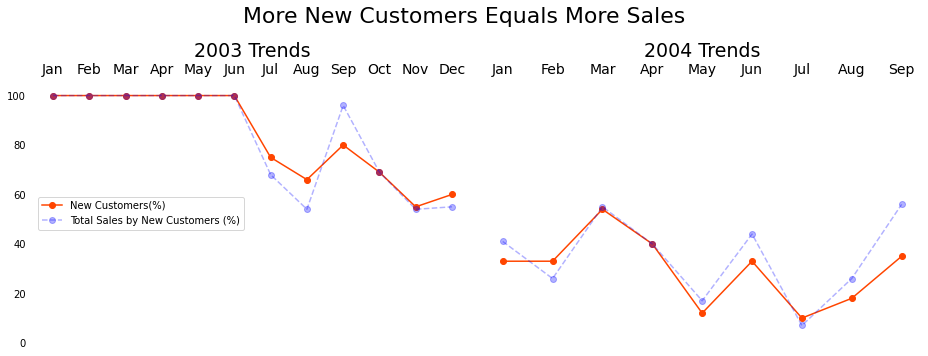

In [21]:
new_customer_report = pd.read_sql_query(
'''WITH
payment_year_month AS(
SELECT *, 
       CAST(SUBSTR(paymentDate, 1,4) AS INTEGER)*100 + CAST(SUBSTR(paymentDate, 6,7) AS INTEGER) AS year_month
  FROM payments
),

monthly_payment_report AS(
SELECT year_month,
       COUNT(DISTINCT customerNumber) AS number_of_customers,
       SUM(amount) AS monthly_total
  FROM payment_year_month
 GROUP BY year_month
),

new_customers_report AS(
SELECT year_month AS Month,
       COUNT(DISTINCT customerNumber) AS number_of_new_customers,
       SUM(amount) AS new_customer_monthly_total,
       (SELECT number_of_customers
          FROM monthly_payment_report
         WHERE year_month = p1.year_month) AS total_customers_that_paid,
       (SELECT monthly_total
          FROM monthly_payment_report
         WHERE year_month = p1.year_month) AS total_amount_paid
  FROM payment_year_month p1
 WHERE customerNumber NOT IN (SELECT customerNumber
                                FROM payment_year_month p2
                               WHERE p2.year_month < p1.year_month)
 GROUP BY year_month
)

SELECT Month AS Month,
       ROUND(number_of_new_customers*100/total_customers_that_paid) AS Percentage_New_Customers,
       ROUND(new_customer_monthly_total*100/total_amount_paid) AS Percentage_Paid_by_New_Customers
  FROM new_customers_report''',conn
)

#Plot 2003 data
data1=new_customer_report[new_customer_report['Month'].between(200301,200312)]
fig = plt.figure(figsize=(13,5))

ax1 = fig.add_subplot(1,2,1)

    #Remove spines
for each_key in ax1.spines.keys():
    ax1.spines[each_key].set_visible(False)

    #Set x axis to the top
ax1.xaxis.tick_top()
ax1.tick_params(bottom=False,left=False,top=False,labeltop=True)

    #Beautify plot
ax1.set_xticks(data1['Month'])
months= ['Jan','Feb','Mar','Apr',
         'May','Jun','Jul','Aug',
         'Sep','Oct','Nov','Dec']
ax1.set_xticklabels(months,size=14)

    #Create plot
plt.plot('Month',
         'Percentage_New_Customers',
         data=data1,marker='o',color='orangered',label='New Customers(%)')

plt.plot('Month',
         'Percentage_Paid_by_New_Customers',
         data=data1,marker='o',color='blue',linestyle='--',alpha=0.3,label="Total Sales by New Customers (%)")

ax1.set_ylim(0,105)

ax1.legend(loc='center left')
ax1.set_title('2003 Trends',size=19,loc='center')

#Plot 2004 data
data2=new_customer_report[new_customer_report['Month'].between(200401,200412)]
ax2 = fig.add_subplot(1,2,2)

    #Remove spines
for each_key in ax2.spines.keys():
    ax2.spines[each_key].set_visible(False)

    #Set x axis to the top
ax2.xaxis.tick_top()
ax2.tick_params(bottom=False,left=False,top=False,
                labeltop=True,labelleft=False)

    #Beautify plot
ax2.set_xticks(data2['Month'])
months2 = ['Jan','Feb','Mar','Apr',
           'May','Jun','Jul','Aug',
           'Sep']
ax2.set_xticklabels(months2,size=14)

    #Plot
plt.plot('Month',
         'Percentage_New_Customers',
         data=data2,marker='o',color='orangered')
plt.plot('Month',
         'Percentage_Paid_by_New_Customers',
         data=data2,marker='o',color='blue',linestyle='--',alpha=0.3)
ax2.set_ylim(0,105)
ax2.set_title('2004 Trends',size=19,loc='center')

#---
plt.suptitle('More New Customers Equals More Sales', size=22,x=0.50)
plt.tight_layout()
plt.show()

**Insights**
* Sales is clearly driven by the number of new customers
* The months of Jan and Feb during 2004 prove to be an exception because despite having the same number of new percentage of new customer for both months, sales went up and subsequently down. This may have been because it was the beginning of the year.
* The number of clients has been decreasing since 2003, and in 2004, we had the lowest values. 
* The store has not had any new customers since September of 2004. This means it makes sense to spend money acquiring new customers.

<a id="4.7"></a>
## Customer Lifetime Value (LTV)
**How much can we spend on acquiring new customers?**     
To determine how much money we can spend acquiring new customers, we can compute the Customer Lifetime Value (LTV), which represents the average amount of money a customer generates. We can then determine how much we can spend on marketing.

In [22]:
%%sql
WITH 

money_in_by_customer_table AS (
SELECT o.customerNumber, SUM(quantityOrdered * (priceEach - buyPrice)) AS revenue
  FROM products p
  JOIN orderdetails od
    ON p.productCode = od.productCode
  JOIN orders o
    ON o.orderNumber = od.orderNumber
 GROUP BY o.customerNumber
)

SELECT ROUND(AVG(mc.revenue), 2) AS ltv
  FROM money_in_by_customer_table mc;

 * sqlite:///stores.db
Done.


ltv
39039.59


**LTV** tells us how much profit an average customer generates during their lifetime with our store. We can use it to predict our future profit. 

<a id="5"></a>
# Recommendations
**Customers**
* Loyal customers should be rewarded with a loyalty program to foster continued business and larger orders.
* As there have been no new customers since Sep 2004, increasing existing customer spending is crucial to maintaining monthly sales numbers. LTV can be used to decide how much can be spent on acquiring new customers.

**Existing and Potential markets**
* Asia-Pacific region markets appear to be underdeveloped. There are probably many buyers eager to spend money on models, at least as a hobby, given the advancement of technology and a market boom.
* Consideration of major market growth into Europe would be a wise investment. Many European countries, like Spain, Norway, and Switzerland, have the resources and are prepared to pay more for each order. For Asian markets like Singapore, the same is valid.

**Products**
* Classic and Vintage car models are the most popular product categories. To boost the value of these models and generate demand, it would be useful to link them to a relevant history.
* The company should take into account additional product categories outside model vehicles, such as stickers, toys, etc., that might help in business expansion.

<a id="6"></a>
# Conclusion
Overally, the business has a positive outlook as they're able to generate constant revenues. While their present market options are limited, they have tremendous opportunities to develop and grow, as indicated in the recommendations section.